## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9351614	total: 58.8ms	remaining: 58.8s
1:	learn: 0.9162644	total: 59.8ms	remaining: 29.8s
2:	learn: 0.8964920	total: 60.7ms	remaining: 20.2s
3:	learn: 0.8802545	total: 61.6ms	remaining: 15.3s
4:	learn: 0.8648021	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8477323	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8310112	total: 64.9ms	remaining: 9.2s
7:	learn: 0.8144938	total: 65.8ms	remaining: 8.15s
8:	learn: 0.7987801	total: 67.3ms	remaining: 7.41s
9:	learn: 0.7819123	total: 68.2ms	remaining: 6.75s
10:	learn: 0.7678208	total: 69.1ms	remaining: 6.21s
11:	learn: 0.7528729	total: 69.9ms	remaining: 5.76s
12:	learn: 0.7380196	total: 70.7ms	remaining: 5.37s
13:	learn: 0.7231423	total: 71.5ms	remaining: 5.03s
14:	learn: 0.7107667	total: 72.2ms	remaining: 4.74s
15:	learn: 0.6968419	total: 73ms	remaining: 4.49s
16:	learn: 0.6832403	total: 73.8ms	remaining: 4.27s
17:	learn: 0.6709147	total: 74.7ms	remaining: 4.07s
18:	learn: 0.6583096	total: 75.4ms	remaining: 3

57:	learn: 0.3825405	total: 109ms	remaining: 1.76s
58:	learn: 0.3794097	total: 109ms	remaining: 1.75s
59:	learn: 0.3758878	total: 110ms	remaining: 1.73s
60:	learn: 0.3723171	total: 111ms	remaining: 1.71s
61:	learn: 0.3690195	total: 112ms	remaining: 1.69s
62:	learn: 0.3661239	total: 113ms	remaining: 1.68s
63:	learn: 0.3628765	total: 114ms	remaining: 1.66s
64:	learn: 0.3595376	total: 115ms	remaining: 1.65s
65:	learn: 0.3563991	total: 115ms	remaining: 1.63s
66:	learn: 0.3529677	total: 116ms	remaining: 1.62s
67:	learn: 0.3505919	total: 117ms	remaining: 1.6s
68:	learn: 0.3478509	total: 118ms	remaining: 1.59s
69:	learn: 0.3448015	total: 119ms	remaining: 1.58s
70:	learn: 0.3419571	total: 120ms	remaining: 1.56s
71:	learn: 0.3388611	total: 120ms	remaining: 1.55s
72:	learn: 0.3362302	total: 121ms	remaining: 1.54s
73:	learn: 0.3335078	total: 122ms	remaining: 1.52s
74:	learn: 0.3307312	total: 123ms	remaining: 1.51s
75:	learn: 0.3285309	total: 124ms	remaining: 1.5s
76:	learn: 0.3262574	total: 124ms

159:	learn: 0.2263043	total: 192ms	remaining: 1.01s
160:	learn: 0.2254469	total: 193ms	remaining: 1s
161:	learn: 0.2247935	total: 194ms	remaining: 1s
162:	learn: 0.2242662	total: 194ms	remaining: 998ms
163:	learn: 0.2237092	total: 195ms	remaining: 996ms
164:	learn: 0.2232869	total: 196ms	remaining: 993ms
165:	learn: 0.2226323	total: 197ms	remaining: 990ms
166:	learn: 0.2221110	total: 198ms	remaining: 987ms
167:	learn: 0.2213019	total: 199ms	remaining: 984ms
168:	learn: 0.2208131	total: 200ms	remaining: 982ms
169:	learn: 0.2203609	total: 200ms	remaining: 979ms
170:	learn: 0.2198523	total: 201ms	remaining: 976ms
171:	learn: 0.2189637	total: 202ms	remaining: 973ms
172:	learn: 0.2184002	total: 203ms	remaining: 970ms
173:	learn: 0.2177228	total: 204ms	remaining: 967ms
174:	learn: 0.2171947	total: 204ms	remaining: 964ms
175:	learn: 0.2166484	total: 205ms	remaining: 961ms
176:	learn: 0.2159050	total: 206ms	remaining: 958ms
177:	learn: 0.2153347	total: 207ms	remaining: 955ms
178:	learn: 0.2146

289:	learn: 0.1658194	total: 299ms	remaining: 731ms
290:	learn: 0.1653964	total: 300ms	remaining: 730ms
291:	learn: 0.1649534	total: 301ms	remaining: 729ms
292:	learn: 0.1646479	total: 301ms	remaining: 727ms
293:	learn: 0.1642001	total: 302ms	remaining: 726ms
294:	learn: 0.1638854	total: 303ms	remaining: 724ms
295:	learn: 0.1637540	total: 304ms	remaining: 723ms
296:	learn: 0.1636509	total: 305ms	remaining: 721ms
297:	learn: 0.1635383	total: 305ms	remaining: 720ms
298:	learn: 0.1634290	total: 306ms	remaining: 718ms
299:	learn: 0.1629021	total: 307ms	remaining: 717ms
300:	learn: 0.1625559	total: 308ms	remaining: 715ms
301:	learn: 0.1623417	total: 309ms	remaining: 714ms
302:	learn: 0.1620201	total: 310ms	remaining: 712ms
303:	learn: 0.1617491	total: 310ms	remaining: 710ms
304:	learn: 0.1615093	total: 311ms	remaining: 709ms
305:	learn: 0.1614207	total: 312ms	remaining: 707ms
306:	learn: 0.1611806	total: 313ms	remaining: 706ms
307:	learn: 0.1605083	total: 313ms	remaining: 704ms
308:	learn: 

390:	learn: 0.1385379	total: 382ms	remaining: 595ms
391:	learn: 0.1382019	total: 383ms	remaining: 594ms
392:	learn: 0.1379622	total: 384ms	remaining: 593ms
393:	learn: 0.1377443	total: 385ms	remaining: 592ms
394:	learn: 0.1374405	total: 386ms	remaining: 590ms
395:	learn: 0.1373180	total: 386ms	remaining: 589ms
396:	learn: 0.1370101	total: 387ms	remaining: 588ms
397:	learn: 0.1368303	total: 388ms	remaining: 587ms
398:	learn: 0.1365279	total: 389ms	remaining: 586ms
399:	learn: 0.1362617	total: 390ms	remaining: 584ms
400:	learn: 0.1359160	total: 390ms	remaining: 583ms
401:	learn: 0.1355656	total: 391ms	remaining: 582ms
402:	learn: 0.1354372	total: 392ms	remaining: 581ms
403:	learn: 0.1353873	total: 393ms	remaining: 579ms
404:	learn: 0.1351756	total: 393ms	remaining: 578ms
405:	learn: 0.1348966	total: 394ms	remaining: 577ms
406:	learn: 0.1345782	total: 395ms	remaining: 576ms
407:	learn: 0.1344448	total: 396ms	remaining: 575ms
408:	learn: 0.1342085	total: 397ms	remaining: 573ms
409:	learn: 

504:	learn: 0.1133229	total: 490ms	remaining: 480ms
505:	learn: 0.1131351	total: 491ms	remaining: 479ms
506:	learn: 0.1129993	total: 492ms	remaining: 479ms
507:	learn: 0.1127840	total: 493ms	remaining: 478ms
508:	learn: 0.1125597	total: 494ms	remaining: 477ms
509:	learn: 0.1123507	total: 495ms	remaining: 476ms
510:	learn: 0.1123016	total: 496ms	remaining: 475ms
511:	learn: 0.1120961	total: 497ms	remaining: 473ms
512:	learn: 0.1119204	total: 498ms	remaining: 472ms
513:	learn: 0.1117495	total: 498ms	remaining: 471ms
514:	learn: 0.1115575	total: 499ms	remaining: 470ms
515:	learn: 0.1113000	total: 500ms	remaining: 469ms
516:	learn: 0.1110651	total: 501ms	remaining: 468ms
517:	learn: 0.1107780	total: 502ms	remaining: 467ms
518:	learn: 0.1106131	total: 503ms	remaining: 466ms
519:	learn: 0.1103112	total: 503ms	remaining: 465ms
520:	learn: 0.1102209	total: 505ms	remaining: 464ms
521:	learn: 0.1101711	total: 506ms	remaining: 463ms
522:	learn: 0.1099255	total: 507ms	remaining: 462ms
523:	learn: 

601:	learn: 0.0974000	total: 573ms	remaining: 379ms
602:	learn: 0.0972205	total: 574ms	remaining: 378ms
603:	learn: 0.0971568	total: 575ms	remaining: 377ms
604:	learn: 0.0969382	total: 576ms	remaining: 376ms
605:	learn: 0.0967279	total: 577ms	remaining: 375ms
606:	learn: 0.0965679	total: 578ms	remaining: 374ms
607:	learn: 0.0964246	total: 578ms	remaining: 373ms
608:	learn: 0.0962278	total: 579ms	remaining: 372ms
609:	learn: 0.0960187	total: 580ms	remaining: 371ms
610:	learn: 0.0958526	total: 581ms	remaining: 370ms
611:	learn: 0.0957456	total: 582ms	remaining: 369ms
612:	learn: 0.0955691	total: 582ms	remaining: 368ms
613:	learn: 0.0954515	total: 583ms	remaining: 367ms
614:	learn: 0.0951987	total: 584ms	remaining: 365ms
615:	learn: 0.0949472	total: 585ms	remaining: 364ms
616:	learn: 0.0947878	total: 585ms	remaining: 363ms
617:	learn: 0.0946573	total: 586ms	remaining: 362ms
618:	learn: 0.0944440	total: 587ms	remaining: 361ms
619:	learn: 0.0942850	total: 588ms	remaining: 360ms
620:	learn: 

730:	learn: 0.0798927	total: 680ms	remaining: 250ms
731:	learn: 0.0797321	total: 681ms	remaining: 249ms
732:	learn: 0.0795619	total: 682ms	remaining: 248ms
733:	learn: 0.0794489	total: 683ms	remaining: 247ms
734:	learn: 0.0792871	total: 683ms	remaining: 246ms
735:	learn: 0.0791664	total: 684ms	remaining: 245ms
736:	learn: 0.0791273	total: 685ms	remaining: 244ms
737:	learn: 0.0791123	total: 686ms	remaining: 243ms
738:	learn: 0.0789711	total: 687ms	remaining: 243ms
739:	learn: 0.0788354	total: 688ms	remaining: 242ms
740:	learn: 0.0787258	total: 688ms	remaining: 241ms
741:	learn: 0.0786466	total: 689ms	remaining: 240ms
742:	learn: 0.0786068	total: 690ms	remaining: 239ms
743:	learn: 0.0784004	total: 691ms	remaining: 238ms
744:	learn: 0.0782678	total: 691ms	remaining: 237ms
745:	learn: 0.0781317	total: 692ms	remaining: 236ms
746:	learn: 0.0780057	total: 693ms	remaining: 235ms
747:	learn: 0.0779495	total: 694ms	remaining: 234ms
748:	learn: 0.0779114	total: 695ms	remaining: 233ms
749:	learn: 

831:	learn: 0.0697321	total: 764ms	remaining: 154ms
832:	learn: 0.0695861	total: 765ms	remaining: 153ms
833:	learn: 0.0694421	total: 765ms	remaining: 152ms
834:	learn: 0.0693009	total: 766ms	remaining: 151ms
835:	learn: 0.0692904	total: 767ms	remaining: 150ms
836:	learn: 0.0691707	total: 768ms	remaining: 150ms
837:	learn: 0.0689992	total: 769ms	remaining: 149ms
838:	learn: 0.0689205	total: 770ms	remaining: 148ms
839:	learn: 0.0688067	total: 770ms	remaining: 147ms
840:	learn: 0.0686653	total: 771ms	remaining: 146ms
841:	learn: 0.0686476	total: 772ms	remaining: 145ms
842:	learn: 0.0685027	total: 773ms	remaining: 144ms
843:	learn: 0.0683902	total: 774ms	remaining: 143ms
844:	learn: 0.0682907	total: 775ms	remaining: 142ms
845:	learn: 0.0682785	total: 775ms	remaining: 141ms
846:	learn: 0.0681627	total: 776ms	remaining: 140ms
847:	learn: 0.0680167	total: 777ms	remaining: 139ms
848:	learn: 0.0679622	total: 778ms	remaining: 138ms
849:	learn: 0.0678851	total: 779ms	remaining: 137ms
850:	learn: 

963:	learn: 0.0581637	total: 871ms	remaining: 32.5ms
964:	learn: 0.0580770	total: 872ms	remaining: 31.6ms
965:	learn: 0.0580349	total: 873ms	remaining: 30.7ms
966:	learn: 0.0579735	total: 874ms	remaining: 29.8ms
967:	learn: 0.0578414	total: 874ms	remaining: 28.9ms
968:	learn: 0.0577484	total: 875ms	remaining: 28ms
969:	learn: 0.0576938	total: 876ms	remaining: 27.1ms
970:	learn: 0.0576309	total: 877ms	remaining: 26.2ms
971:	learn: 0.0575552	total: 878ms	remaining: 25.3ms
972:	learn: 0.0574557	total: 878ms	remaining: 24.4ms
973:	learn: 0.0573407	total: 879ms	remaining: 23.5ms
974:	learn: 0.0573270	total: 880ms	remaining: 22.6ms
975:	learn: 0.0572512	total: 881ms	remaining: 21.7ms
976:	learn: 0.0571308	total: 882ms	remaining: 20.8ms
977:	learn: 0.0570661	total: 883ms	remaining: 19.9ms
978:	learn: 0.0570172	total: 883ms	remaining: 18.9ms
979:	learn: 0.0569738	total: 884ms	remaining: 18ms
980:	learn: 0.0568541	total: 885ms	remaining: 17.1ms
981:	learn: 0.0567761	total: 886ms	remaining: 16.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

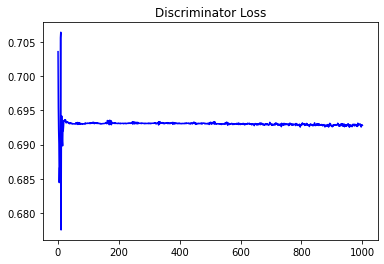

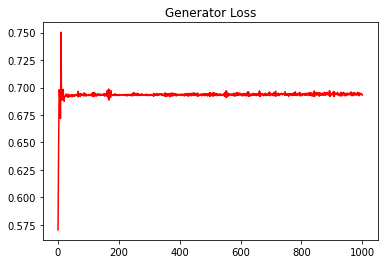

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2541546049816475


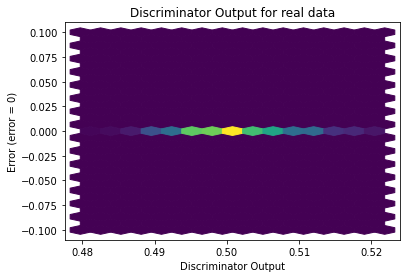

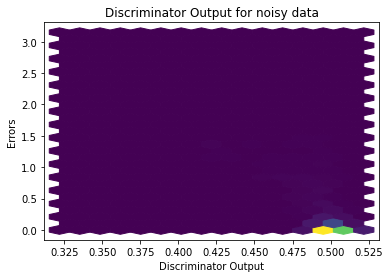

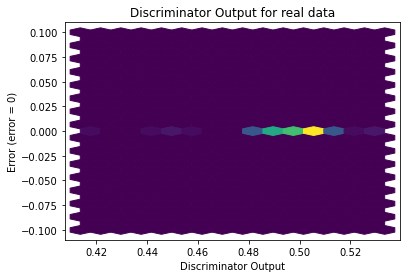

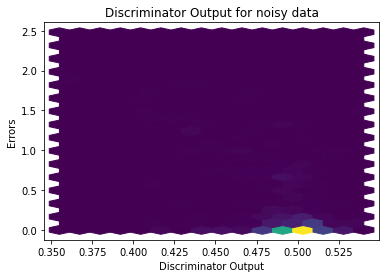

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


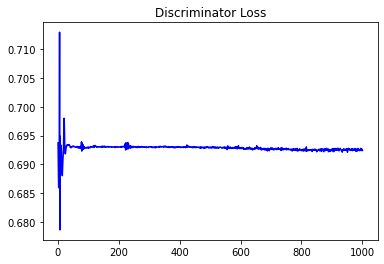

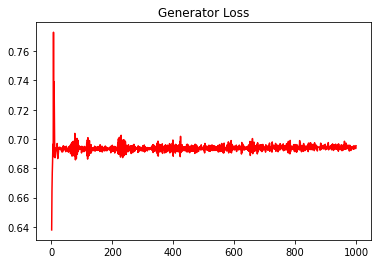

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.26045254921825445


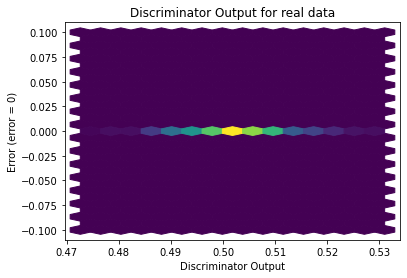

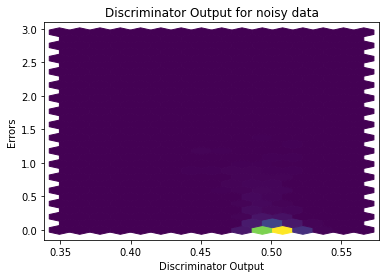

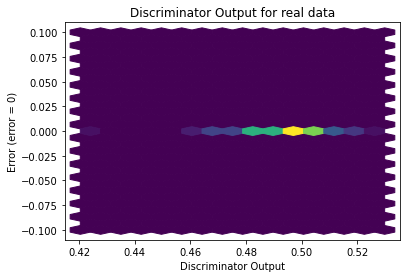

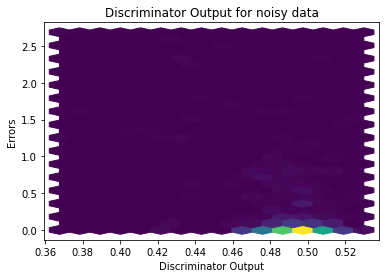

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4611]], requires_grad=True)
